In [ ]:
import math
import os
import sys
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import multiprocessing
import parmap
import numpy as np
import collections
from tqdm.notebook import tqdm
import pandarallel
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=20, progress_bar=True)
# tqdm.pandas()
from pprint import pprint
from scipy.stats import zscore
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
sys.path.append('..')
from src.utils.utils import load_config_file
import json

In [3]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            if i == 0:
                value = "{:.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation)

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
# yaml = load_config_file()
# exotic_files = yaml["EXOTIC"]

In [4]:
# exotic_file = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC.parquet')
exotic_file = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_2021.parquet')
exotic_file

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,MAP,mean_proportion,Adipose - Subcutaneous_exotic,Adipose - Visceral (Omentum)_exotic,...,Skin - Not Sun Exposed (Suprapubic)_pextvalue,Skin - Sun Exposed (Lower leg)_pextvalue,Small Intestine - Terminal Ileum_pextvalue,Spleen_pextvalue,Stomach_pextvalue,Testis_pextvalue,Thyroid_pextvalue,Uterus_pextvalue,Vagina_pextvalue,Whole Blood_pextvalue
0,A1CF,ENSG00000148584,24086,52573798-52573822,0.375000,8,A1CF_52573798-52573822,0.030960,NaN,NaN,...,NaN,0.00000,0.16110,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN
1,A1CF,ENSG00000148584,24086,52610425-52610547,0.375000,8,A1CF_52610425-52610547,0.006439,NaN,NaN,...,NaN,0.00000,0.05501,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN
2,A1CF,ENSG00000148584,24086,52619602-52619700,0.625000,8,A1CF_52619602-52619700,0.979670,NaN,NaN,...,NaN,1.00000,0.94499,NaN,1.00000,0.66667,1.00000,NaN,NaN,NaN
3,A2ML1,ENSG00000166535,23336,8975248-8975309,0.500000,2,A2ML1_8975248-8975309,0.695140,0.731334,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.0000
4,A2ML1,ENSG00000166535,23336,8975778-8975961,0.500000,2,A2ML1_8975778-8975961,0.695140,0.731334,0.731334,...,0.57888,0.54618,1.00000,1.00000,1.00000,0.20471,1.00000,0.43478,0.69070,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45049,ZYG11A,ENSG00000203995,32058,53308556-53308645,0.500000,2,ZYG11A_53308556-53308645,0.160540,0.368199,0.368199,...,0.00000,0.16667,0.00000,0.53846,0.00000,0.80328,0.80000,0.00000,0.00000,NaN
45050,ZYG11A,ENSG00000203995,32058,53320137-53320302,0.500000,2,ZYG11A_53320137-53320302,0.160540,0.368199,0.368199,...,0.00000,0.16667,0.00000,0.53846,0.00000,0.80328,0.80000,0.00000,0.00000,NaN
45051,ZYG11A,ENSG00000203995,32058,53322670-53323421,0.500000,2,ZYG11A_53322670-53323421,0.160540,0.368199,0.368199,...,0.00000,0.16667,0.00000,0.53846,0.00000,0.80328,0.80000,0.00000,0.00000,NaN
45052,ZYG11A,ENSG00000203995,32058,53326403-53326421,0.500000,2,ZYG11A_53326403-53326421,0.160540,0.368199,0.368199,...,0.00000,0.16667,0.00000,0.53846,0.00000,0.80328,0.80000,0.00000,0.00000,NaN


      symbol  MAP
0       A1CF    3
1        A2M    5
2      A2ML1   13
3       AAAS    1
4       AACS    3
...      ...  ...
8751  ZWILCH    5
8752   ZWINT    2
8753    ZXDC    5
8754  ZYG11A    4
8755     ZYX    1

[8756 rows x 2 columns]


(0.0, 15.0)

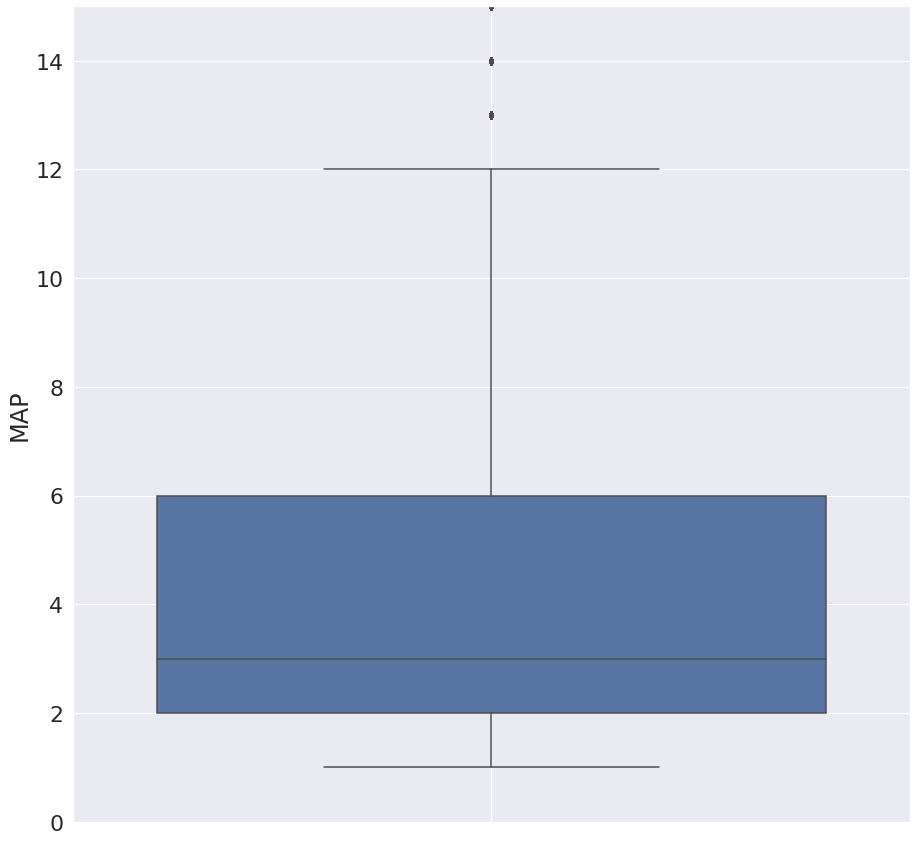

In [6]:
intermediate_file = exotic_file.drop_duplicates()

test = intermediate_file[["symbol", "MAP"]].groupby("symbol").nunique().drop(["symbol"], axis=1).reset_index()
print(test)
sns.set(font_scale=2)
sns.set_style
f, ax = plt.subplots(figsize=(15, 15))
v = sns.boxplot(data=test, y="MAP", ax=ax)
# self.show_values_on_bars(v, 0)
# v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
ax.set_ylim(0, 15)

In [6]:
intermediate_file = exotic_file.drop_duplicates()
intermediate_file = intermediate_file.loc[
    (intermediate_file["mean_proportion"] > 0)
    & (intermediate_file["mean_proportion"] < 1)
    # & (intermediate_file["Ratio_num"] <= 0.5)
].reset_index(drop=True)
# intermediate_file = intermediate_file.loc[(intermediate_file["Ratio_num"] > 0.5)].reset_index(drop=True)

# intermediate_file = intermediate_file.tail(1000)

pext = intermediate_file.filter(regex="pext")

exotic = intermediate_file.filter(regex="exotic")
pext["Max"] = pext.parallel_apply(lambda r: max(r.dropna()) if r.dropna().shape[0] > 0 else np.nan, axis=1)
pext["MAP"] = intermediate_file["MAP"]
pext["symbol"] = intermediate_file["symbol"]

exotic["Max"] = exotic.parallel_apply(lambda r: max(r.dropna()) if r.dropna().shape[0] > 0 else np.nan, axis=1)
exotic["Tissues_Max"] = exotic.parallel_apply(
    lambda r: [list(exotic.columns)[j].replace("_exotic", "") for j, e in enumerate(r[:-1]) if e == r["Max"]], axis=1
)
exotic["Tissues_Max_organs"] = exotic["Tissues_Max"].apply(lambda r: list(set([e.split(" - ")[0] for e in r])))
exotic["pext_max"] = pext["Max"]

exotic["MAP"] = intermediate_file["MAP"]
exotic["Ratio_num"] = intermediate_file["Ratio_num"]
exotic["mRNA_nb"] = intermediate_file["mRNA_nb"]
exotic["symbol"] = intermediate_file["symbol"]

# # exotic = exotic.loc[(exotic["Max"] > 0.99)]

# # print(exotic[["MAP", "Nerve - Tibial_exotic"]])
# # print(pext.loc[exotic.index])

# # exotic["tissues_no_threshold"] = (
# #     exotic.filter(regex="exotic")
# #     .fillna(0)
# #     .apply(
# #         lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.90 and c < 0.95], axis=1
# #     )
# # )

exotic["tissues_OK_bronze"] = (
    exotic.filter(regex="exotic")
    .fillna(0)
    .apply(
        lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.90 and c < 0.95], axis=1
    )
)
exotic["tissues_OK_silver"] = (
    exotic.filter(regex="exotic")
    .fillna(0)
    .apply(
        lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.95 and c < 0.99], axis=1
    )
)
exotic["tissues_OK_gold"] = (
    exotic.filter(regex="exotic")
    .fillna(0)
    .apply(lambda r: [exotic.columns[j].replace("_exotic", "") for j, c in enumerate(r) if c >= 0.99], axis=1)
)
exotic["pext_OK"] = (
    pext.filter(regex="pext")
    .fillna(0)
    .apply(lambda r: [pext.columns[j].replace("_pextvalue", "") for j, c in enumerate(r) if c > 0.1], axis=1)
)
# exotic["No_threshold"] = exotic.apply(
#     lambda r: list(set(r["tissues_no_threshold"]).intersection(set(r["pext_OK"]))), axis=1
# )
exotic["OK_bronze"] = exotic.apply(lambda r: list(set(r["tissues_OK_bronze"]).intersection(set(r["pext_OK"]))), axis=1)
exotic["OK_silver"] = exotic.apply(lambda r: list(set(r["tissues_OK_silver"]).intersection(set(r["pext_OK"]))), axis=1)
exotic["OK_gold"] = exotic.apply(lambda r: list(set(r["tissues_OK_gold"]).intersection(set(r["pext_OK"]))), axis=1)
exotic["OK"] = exotic.apply(lambda r: r["OK_bronze"] + r["OK_silver"] + r["OK_gold"], axis=1)


# print(
#     pd.concat(
#         [
#             # exotic["No_threshold"].explode().value_counts(),
#             exotic["OK_bronze"].explode().value_counts(),
#             exotic["OK_silver"].explode().value_counts(),
#             exotic["OK_gold"].explode().value_counts(),
#         ],
#         axis=1,
#     )
# )

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(-0.05, 1.08, 'a')

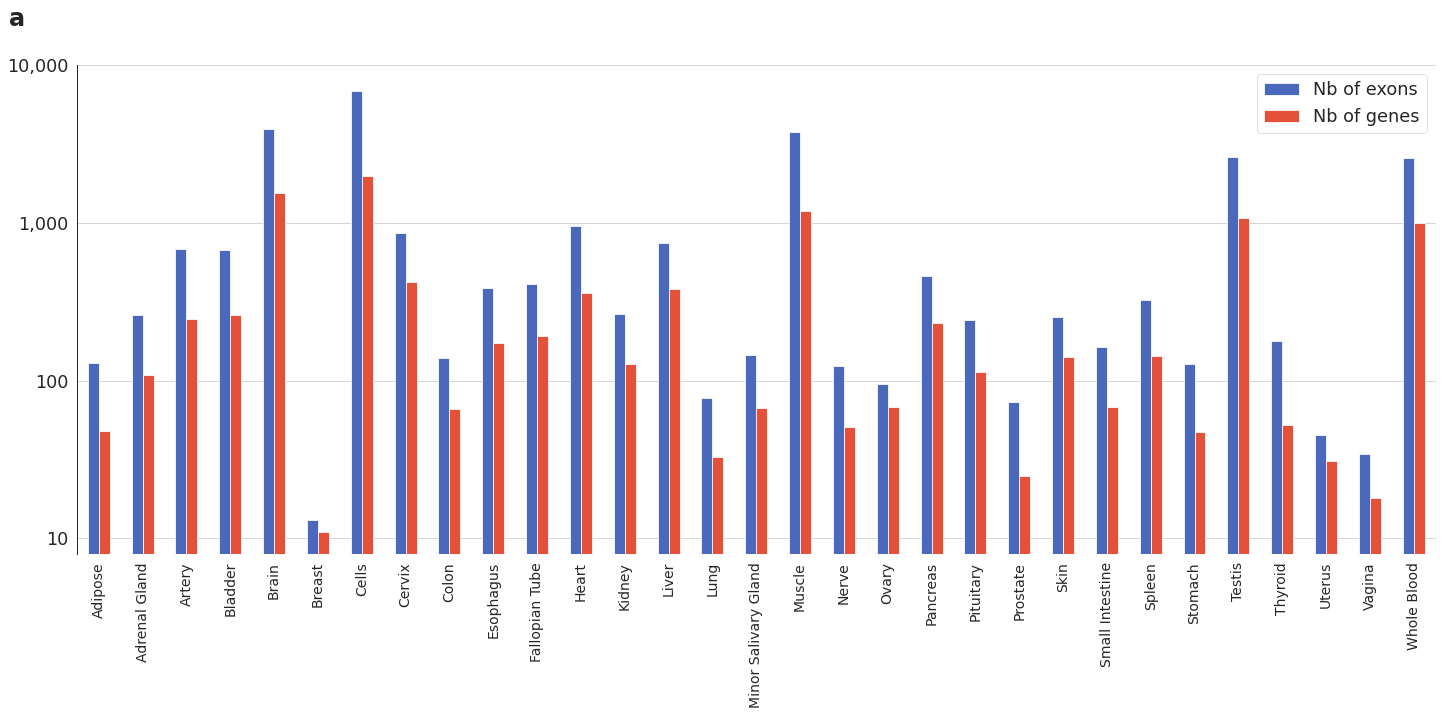

In [39]:
t = exotic[["MAP", "symbol", "OK"]]
t['SuperOK'] = t['OK'].apply(lambda r: [e.split(' - ')[0] for e in r])
t = t.loc[t["SuperOK"].str.len() > 0].explode("SuperOK")

t = t.groupby(["SuperOK"]).nunique().drop(["SuperOK", 'OK'], axis=1)
t.columns = ["Nb of exons", "Nb of genes"]

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = t.plot.bar(ax=ax, color=['#4a69bd', '#e55039'])
# show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=14)
plt.xlabel("")
plt.yscale("log")

ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
ax.spines['bottom'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.ylim(0, 10000)
ax.text(-0.05, 1.08, 'a', transform=ax.transAxes, size=24, weight='bold')

# f.savefig("data/paper/1_EXOTIC/barplot_tissues_genes_exons.png")


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(-0.05, 1.08, 'a')

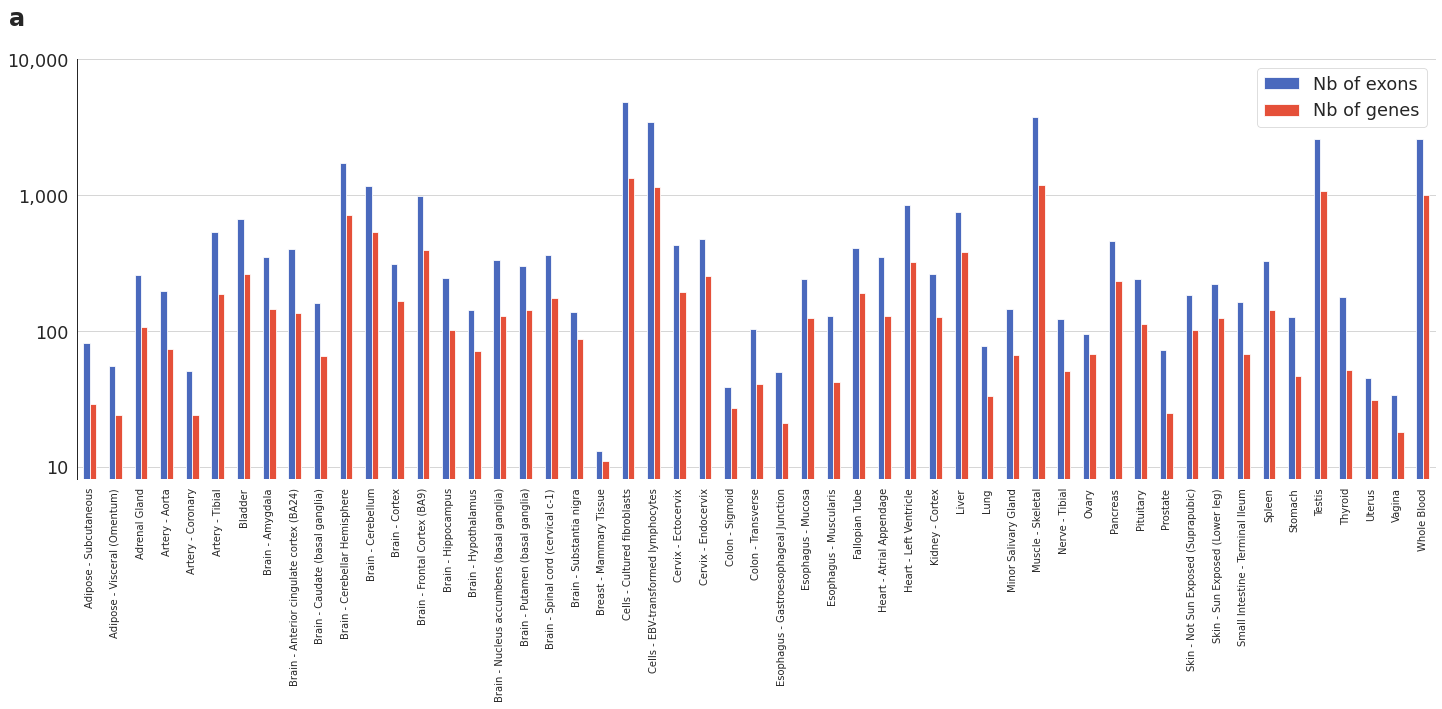

In [34]:
t = exotic[["MAP", "symbol", "OK"]]
t = t.loc[t["OK"].str.len() > 0].explode("OK")
t = t.groupby(["OK"]).nunique().drop(["OK"], axis=1)
t.columns = ["Nb of exons", "Nb of genes"]

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = t.plot.bar(ax=ax, color=['#4a69bd', '#e55039'])
# show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=10)
plt.xlabel("")
plt.yscale("log")

ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
ax.spines['bottom'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.ylim(0, 10000)
ax.text(-0.05, 1.08, 'a', transform=ax.transAxes, size=24, weight='bold')

# f.savefig("data/paper/1_EXOTIC/barplot_tissues_genes_exons.png")


In [7]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 1)) + " - " + str(round(labels[j + 1], 1)) for j in range(len(labels) - 1)]
exotic["Ratio_num_bins"] = pd.cut(exotic["Ratio_num"], bins=bins, labels=labels_ratio, include_lowest=True)

bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 1)) + " - " + str(round(labels[j + 1], 1)) for j in range(len(labels) - 1)]
exotic["pext_max_bins"] = pd.cut(exotic["pext_max"], bins=bins, labels=labels_ratio, include_lowest=True)

bins = [0, 0.9, 0.95, 0.99, 1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
exotic["Max_bins"] = pd.cut(exotic["Max"], bins=bins, labels=labels_ratio, include_lowest=True)


In [34]:
exotic.loc[exotic['OK'].str.len() > 0]

,Adipose - Subcutaneous_exotic,Adipose - Visceral (Omentum)_exotic,Adrenal Gland_exotic,Artery - Aorta_exotic,Artery - Coronary_exotic,Artery - Tibial_exotic,Bladder_exotic,Brain - Amygdala_exotic,Brain - Anterior cingulate cortex (BA24)_exotic,Brain - Caudate (basal ganglia)_exotic,...,tissues_OK_silver,tissues_OK_gold,pext_OK,OK_bronze,OK_silver,OK_gold,OK,Ratio_num_bins,pext_max_bins,Max_bins
0,NaN,NaN,0.390920,0.390920,NaN,0.390920,0.390920,NaN,NaN,NaN,...,[],[],"[Liver, Pancreas, Small Intestine - Terminal I...","[Liver, Pancreas]",[],[],"[Liver, Pancreas]",0.2 - 0.4,0.2 - 0.4,0.9 - 0.95
15,0.326105,0.326105,0.326105,0.326105,0.326105,0.326105,0.372216,0.534350,0.624124,0.631461,...,[],[],"[Brain - Amygdala, Brain - Anterior cingulate ...","[Cervix - Endocervix, Ovary, Brain - Cerebella...",[],[],"[Cervix - Endocervix, Ovary, Brain - Cerebella...",0.4 - 0.6,0.4 - 0.6,0.9 - 0.95
16,0.758851,0.709829,0.256318,0.738283,0.690467,0.817057,0.754720,0.366258,0.462202,0.549436,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Cells - Cultured fibroblasts],[],[],[Cells - Cultured fibroblasts],0.6 - 0.8,0.8 - 1,0.9 - 0.95
17,0.758851,0.709829,0.256318,0.738283,0.690467,0.817057,0.754720,0.366258,0.462202,0.549436,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Cells - Cultured fibroblasts],[],[],[Cells - Cultured fibroblasts],0.6 - 0.8,0.8 - 1,0.9 - 0.95
18,0.758851,0.709829,0.256318,0.738283,0.690467,0.817057,0.754720,0.366258,0.462202,0.549436,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Cells - Cultured fibroblasts],[],[],[Cells - Cultured fibroblasts],0.4 - 0.6,0.8 - 1,0.9 - 0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45048,0.728523,0.537890,0.457341,0.793858,0.664111,0.939074,0.771235,0.388147,0.438358,0.386596,...,[],[],"[Adipose - Subcutaneous, Adipose - Visceral (O...",[Artery - Tibial],[],[],[Artery - Tibial],0.4 - 0.6,0.2 - 0.4,0.9 - 0.95
45049,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,[],[],"[Bladder, Breast - Mammary Tissue, Cells - Cul...","[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95
45050,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,[],[],"[Bladder, Breast - Mammary Tissue, Cells - Cul...","[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95
45051,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,[],[],"[Bladder, Breast - Mammary Tissue, Cells - Cul...","[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95


Rectangle(xy=(-0.4, 0), width=0.2, height=22369, angle=0)
Rectangle(xy=(0.6, 0), width=0.2, height=6074, angle=0)
Rectangle(xy=(-0.2, 0), width=0.2, height=10641, angle=0)
Rectangle(xy=(0.8, 0), width=0.2, height=3525, angle=0)
Rectangle(xy=(2.77556e-17, 0), width=0.2, height=8858, angle=0)
Rectangle(xy=(1, 0), width=0.2, height=3086, angle=0)
Rectangle(xy=(0.2, 0), width=0.2, height=3061, angle=0)
Rectangle(xy=(1.2, 0), width=0.2, height=1560, angle=0)


Text(-0.15, 1.05, 'a')

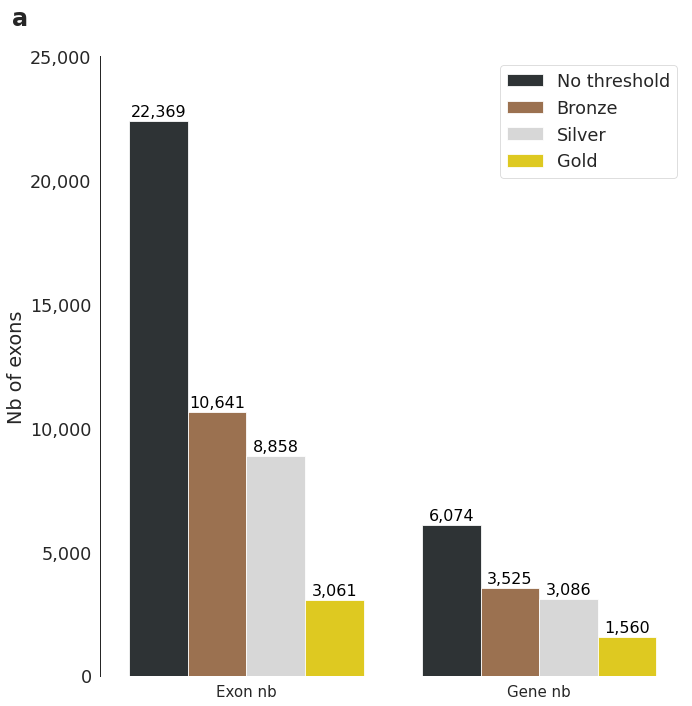

In [22]:

## BARPLOT EXOTIC COUNT CUTOFFS

def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

tmp_barplot = pd.concat([exotic, intermediate_file[['symbol', 'Exon']]], axis=1, join='inner')
tmp_barplot_exon_level = tmp_barplot[['Max_bins', 'Exon']].drop_duplicates().groupby("Max_bins").size().reset_index()
tmp_barplot_exon_level.columns = ['Max_bins', 'Exon nb']
tmp_barplot_gene_level = tmp_barplot[['Max_bins', 'symbol']].drop_duplicates().groupby("Max_bins").size().reset_index()
tmp_barplot_gene_level.columns = ['Max_bins', 'Gene nb']
tmp_barplot = pd.concat([tmp_barplot_exon_level, tmp_barplot_gene_level['Gene nb']], axis=1)
# tmp_barplot['Exons nb / gene'] = tmp_barplot['Exon nb'] / tmp_barplot['Gene nb']
tmp_barplot = tmp_barplot.melt(id_vars='Max_bins', value_vars=['Exon nb', 'Gene nb'])
# tmp_barplot.columns = ["variable", "value"]
tmp_barplot["Max_bins"] = tmp_barplot["Max_bins"].cat.rename_categories(
    {"0 - 0.9": "No\nthreshold", "0.9 - 0.95": "Bronze", "0.95 - 0.99": "Silver", "0.99 - 1": "Gold"}
)
if "0 - 0.8" in tmp_barplot["Max_bins"].cat.categories:
    tmp_barplot["Max_bins"] = tmp_barplot["Max_bins"].cat.remove_categories(["0 - 0.8"])

# tmp_barplot = tmp_barplot.loc[tmp_barplot["variable"].isna() == False]
# # tmp_barplot["variable"] = tmp_barplot["variable"].cat.add_categories(["Total"])
# # tmp_barplot.loc[0] = ["Total", exotic.shape[0]]
# tmp_barplot.sort_index(inplace=True)
# tmp_barplot

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(10, 10))
v = sns.barplot(data=tmp_barplot, x="variable", y="value", hue='Max_bins', ax=ax, palette={'No\nthreshold' : "#2d3436", 'Bronze' : "#A77044", 'Silver' : "#D7D7D7", 'Gold': "#FEE101"})
plt.xticks()
show_values_on_bars(v, i=0, fontsize=16, pad=200)
v.set_xticklabels(v.get_xticklabels(),fontsize=15)
plt.xlabel("")
plt.ylabel("Nb of exons")
# ax.grid(True, axis="y")
ax.spines['bottom'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
f.tight_layout(rect=[0, 0.05, 1, 1])
plt.ylim(0,25000)
legend = v.get_legend()
legend.set_title('')
legend.texts[0].set_text("No threshold")
ax.text(-0.15, 1.05, 'a', transform=ax.transAxes, size=24, weight='bold')

# legend.texts[1].set_text("Alternative")
# # f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins.png")


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


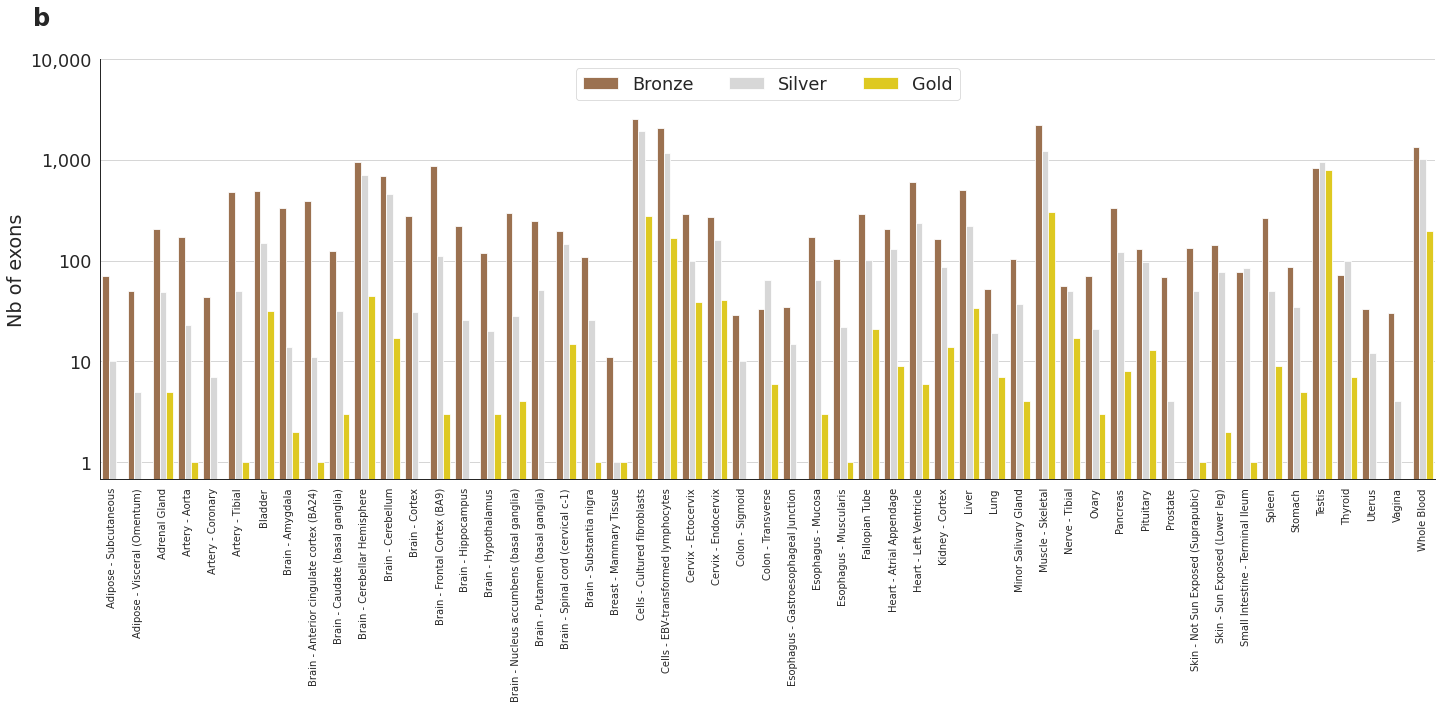

In [23]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = sns.barplot(
    data=tmp_barplot_tissues,
    x="Tissue",
    y="Nb of exons",
    hue="Threshold",
    ax=ax,
    palette=["#A77044", "#D7D7D7", "#FEE101"],
)
# show_values_on_bars(v, i=0, fontsize=8, rotation=90, pad=0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=10)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.xlabel("")
plt.yscale('log')
ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
legend = v.get_legend()
legend.set_title('')
ax.text(-0.05, 1.08, 'b', transform=ax.transAxes, size=24, weight='bold')
plt.ylim(0, 10000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.ticklabel_format(axis='y', useOffset=False)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
v.legend(ncol=3)

legend = v.get_legend()
legend.set_title('')
legend.texts[0].set_text("Bronze")
legend.texts[1].set_text("Silver")
legend.texts[2].set_text("Gold")
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins_tissues_05.png")

In [8]:
bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Tissue,Threshold,Nb of exons
0,Adipose - Subcutaneous,bronze,71.0
1,Adipose - Visceral (Omentum),bronze,50.0
2,Adrenal Gland,bronze,206.0
3,Artery - Aorta,bronze,173.0
4,Artery - Coronary,bronze,44.0
...,...,...,...
154,Testis,gold,800.0
155,Thyroid,gold,7.0
156,Uterus,gold,NaN
157,Vagina,gold,NaN


In [ ]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

bronze = exotic["OK_bronze"].explode().dropna().value_counts()
silver = exotic["OK_silver"].explode().dropna().value_counts()
gold = exotic["OK_gold"].explode().dropna().value_counts()

tmp_barplot_tissues = (
    pd.concat([bronze, silver, gold], axis=1)
    .reset_index()
    .melt(id_vars="index", value_vars=["OK_bronze", "OK_silver", "OK_gold"])
)
tmp_barplot_tissues.columns = ["Tissue", "Threshold", "Nb of exons"]
tmp_barplot_tissues["Threshold"] = tmp_barplot_tissues["Threshold"].str.replace("OK_", "")
tmp_barplot_tissues

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(20, 10))
v = sns.barplot(
    data=tmp_barplot_tissues,
    x="Tissue",
    y="Nb of exons",
    hue="Threshold",
    ax=ax,
    palette=["#A77044", "#D7D7D7", "#FEE101"],
)
# show_values_on_bars(v, i=0, fontsize=8, rotation=90, pad=0)
v.set_xticklabels(v.get_xticklabels(), rotation=90, fontsize=10)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.xlabel("")
plt.yscale('log')
ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
legend = v.get_legend()
legend.set_title('')
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins_tissues_05.png")

In [28]:

# HEATMAP

exotic["OK_organs"] = exotic["OK"].apply(lambda r: list(set([e.split(" - ")[0] for e in r])))
exotic["Len_tissues"] = exotic["OK"].apply(lambda r: len(r))

t = exotic.explode("OK_organs")
l = exotic["Tissues_Max_organs"].values.tolist()
l = [list(set([e.split(" - ")[0] for e in r])) for r in l if len(r) > 1]
l = [e for e in l if len(e) <= 2]
l = [[e[0], e[0]] if len(e) == 1 else e for e in l]
new_l = list()
for e in l:
    if e[0] == e[1]:
        new_l.append({"Tissue_0": e[0], "Tissue_1": e[1]})
    else:
        new_l.append({"Tissue_0": e[0], "Tissue_1": e[1]})
        # new_l.append({"Tissue_0": e[1], "Tissue_1": e[0]})

tmp_df_heatmap = pd.DataFrame(new_l).groupby(["Tissue_0", "Tissue_1"]).size()
tmp_df_heatmap = tmp_df_heatmap.reset_index()
tmp_df_heatmap.columns = ["Tissue_0", "Tissue_1", "value"]
tmp_df_heatmap
# print(tmp_df_heatmap.sort_values("value", ascending=False))

,Tissue_0,Tissue_1,value
0,Adrenal Gland,Liver,4
1,Adrenal Gland,Muscle,2
2,Artery,Adipose,1
3,Artery,Adrenal Gland,1
4,Artery,Brain,9
...,...,...,...
143,Uterus,Testis,2
144,Whole Blood,Cells,270
145,Whole Blood,Esophagus,1
146,Whole Blood,Liver,50


In [9]:



def median_pext(r):
    try:
        return np.median([e for e in r["pext_values"] if math.isnan(e) is False and e != r["pext_max"]])
    except:
        print(r)
        exit()

exotic_gap = exotic.copy()
exotic_gap["pext_max"] = pext["Max"]
exotic_gap["pext_values"] = pext[pext.columns[:-3]].values.tolist()
exotic_gap = exotic_gap.dropna(subset=["Max"])
exotic_gap = exotic_gap.loc[exotic_gap["pext_max"] > 0.1]
exotic_gap["pext_median_except_max"] = exotic_gap.apply(lambda r: median_pext(r), axis=1)
exotic_gap["pext_shift"] = exotic_gap["pext_max"] - exotic_gap["pext_median_except_max"]
exotic_gap
# print(exotic)


,Adipose - Subcutaneous_exotic,Adipose - Visceral (Omentum)_exotic,Adrenal Gland_exotic,Artery - Aorta_exotic,Artery - Coronary_exotic,Artery - Tibial_exotic,Bladder_exotic,Brain - Amygdala_exotic,Brain - Anterior cingulate cortex (BA24)_exotic,Brain - Caudate (basal ganglia)_exotic,...,OK_bronze,OK_silver,OK_gold,OK,Ratio_num_bins,pext_max_bins,Max_bins,pext_values,pext_median_except_max,pext_shift
0,NaN,NaN,0.390920,0.390920,NaN,0.390920,0.390920,NaN,NaN,NaN,...,"[Liver, Pancreas]",[],[],"[Liver, Pancreas]",0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,"[nan, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, ...",0.000000,0.236140
2,NaN,NaN,0.574705,0.574705,NaN,0.574705,0.574705,NaN,NaN,NaN,...,[],[],[],[],0.6 - 0.8,0.8 - 1,0 - 0.9,"[nan, nan, 1.0, 1.0, nan, 1.0, 1.0, nan, nan, ...",0.942175,0.057825
3,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
4,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
5,0.731334,0.731334,0.731334,0.731334,0.731334,0.731334,0.486061,0.252556,0.239279,0.239806,...,[],[],[],[],0.4 - 0.6,0.8 - 1,0 - 0.9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67816, 0.3648...",0.391300,0.608700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45049,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,"[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85714, 0.0, 0...",0.000000,1.000000
45050,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,"[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85714, 0.0, 0...",0.000000,1.000000
45051,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,"[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85714, 0.0, 0...",0.000000,1.000000
45052,0.368199,0.368199,0.368199,0.368199,0.368199,0.368199,0.912362,0.368199,0.368199,0.368199,...,"[Bladder, Cells - Cultured fibroblasts, Cells ...",[],[],"[Bladder, Cells - Cultured fibroblasts, Cells ...",0.4 - 0.6,0.8 - 1,0.9 - 0.95,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85714, 0.0, 0...",0.000000,1.000000


In [35]:
tmp_barplot

,Ratio_num_bins,pext_max_bins,Max_bins,pext_max,Max
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.23614,0.949734
2,0.6 - 0.8,0.8 - 1,0 - 0.9,1.00000,0.574705
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.735143
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.735143
5,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.735143
...,...,...,...,...,...
45049,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435
45050,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435
45051,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435
45052,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.89855,0.939435


In [10]:
tmp_barplot = exotic_gap[
    [
        "Ratio_num_bins",
        "pext_max_bins",
        "Max_bins",
        "pext_max",
        "Max",
        "pext_median_except_max",
        "pext_shift",
    ]
]
tmp_barplot = tmp_barplot.rename({"Ratio_num_bins": "Exon freq"}, axis=1).melt(
    id_vars=[
        "Exon freq",
        "pext_max_bins",
        "Max_bins",
        "pext_max",
        'Max'
    ],
    value_vars=[
        "pext_median_except_max",
        "pext_shift",
        
        # "pext_max",
    ],
)
tmp_barplot

,Exon freq,pext_max_bins,Max_bins,pext_max,Max,variable,value
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.23614,0.949734,pext_median_except_max,0.000000
1,0.6 - 0.8,0.8 - 1,0 - 0.9,1.00000,0.574705,pext_median_except_max,0.942175
2,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.00000,0.731334,pext_median_except_max,0.391300
...,...,...,...,...,...,...,...
84071,0.4 - 0.6,0.8 - 1,0.9 - 0.95,1.00000,0.943922,pext_shift,1.000000
84072,0.4 - 0.6,0.8 - 1,0.9 - 0.95,1.00000,0.943922,pext_shift,1.000000
84073,0.4 - 0.6,0.8 - 1,0.9 - 0.95,1.00000,0.943922,pext_shift,1.000000
84074,0.4 - 0.6,0.8 - 1,0.9 - 0.95,1.00000,0.943922,pext_shift,1.000000


In [140]:
tmp_barplot

,Exon freq,pext_max_bins,Max_bins,pext_max,Max,variable,value
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.236140,0.949734,pext_median_except_max,0.000000
1,0.2 - 0.4,0 - 0.2,0.95 - 0.99,0.060643,0.957909,pext_median_except_max,0.000000
2,0.6 - 0.8,0.8 - 1,0 - 0.9,1.000000,0.574705,pext_median_except_max,0.942175
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
...,...,...,...,...,...,...,...
90103,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90104,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90105,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90106,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550


In [4]:

# CLEANING
exotic = exotic.dropna(subset=["Max"])
exotic = exotic.loc[exotic["pext_max"] > 0.1]

In [151]:
tmp_barplot

,Exon freq,pext_max_bins,Max_bins,pext_max,Max,variable,value
0,0.2 - 0.4,0.2 - 0.4,0.9 - 0.95,0.236140,0.949734,pext_median_except_max,0.000000
1,0.2 - 0.4,0 - 0.2,0.95 - 0.99,0.060643,0.957909,pext_median_except_max,0.000000
2,0.6 - 0.8,0.8 - 1,0 - 0.9,1.000000,0.574705,pext_median_except_max,0.942175
3,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
4,0.4 - 0.6,0.8 - 1,0 - 0.9,1.000000,0.735143,pext_median_except_max,0.391300
...,...,...,...,...,...,...,...
90103,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90104,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90105,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550
90106,0.4 - 0.6,0.8 - 1,0.9 - 0.95,0.898550,0.939435,pext_shift,0.898550


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


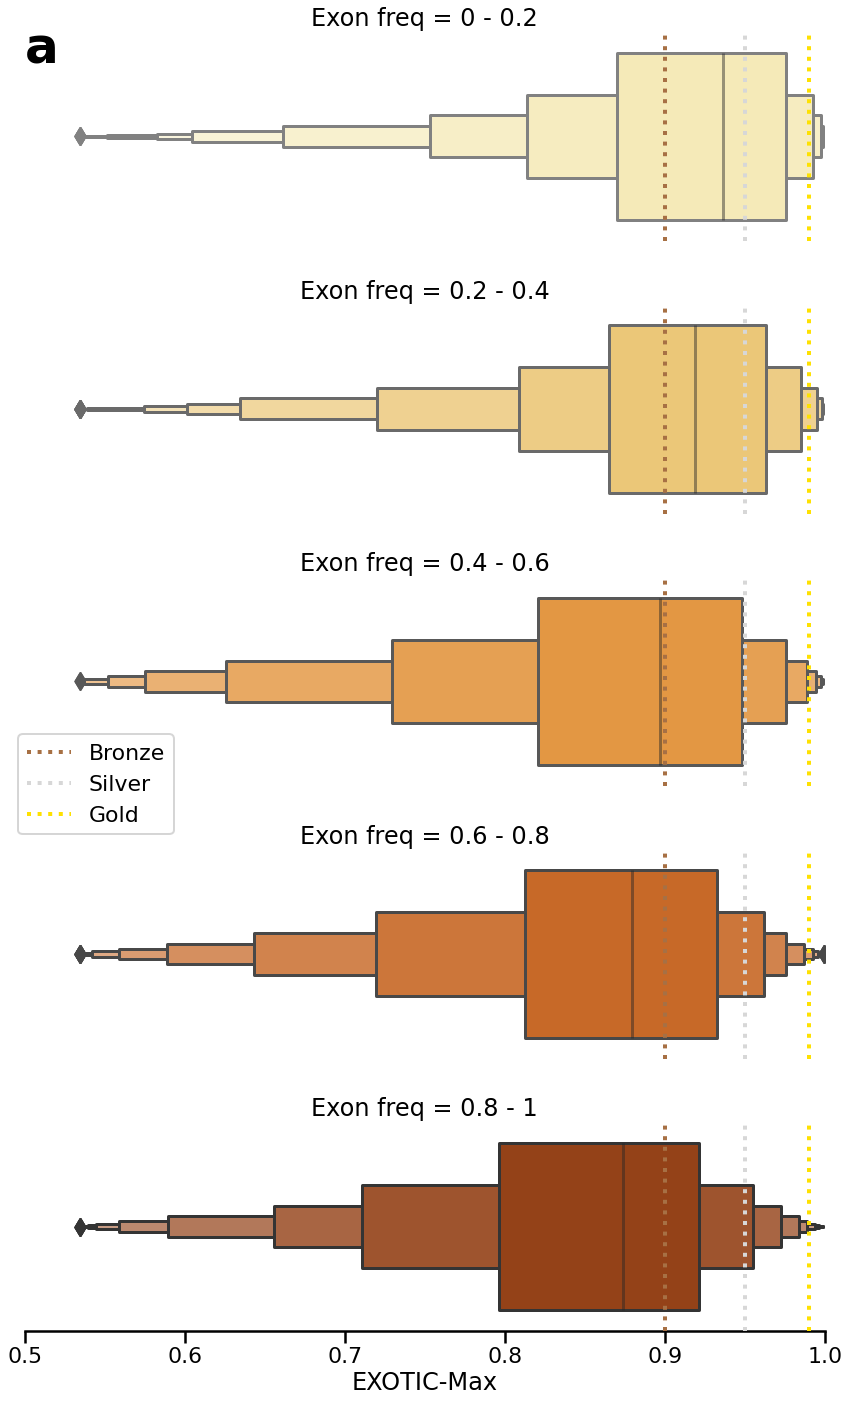

In [32]:
sns.set_context("poster")
# f, ax = plt.subplots(figsize=(15, 15))
grid = sns.FacetGrid(
    tmp_barplot,
    row="Exon freq",
    hue="Exon freq",
    # row="Ratio_num_bins",
    palette="YlOrBr",
    # margin_titles=True,
    height=4,
    aspect=3,
)
grid.map(sns.boxenplot, "Max")
# self.show_values_on_bars(v, 0)
# v.set_xticklabels(v.get_xticklabels(), rotation=90)
# plt.xlabel("")
# ax.grid(True, axis="x")
# ["#A77044", "#D7D7D7", "#FEE101"]

lwa = 4
for j, ax in enumerate(grid.axes.flat):
    ax.spines['left'].set_linewidth(0)
    ax.axvline(0.9, zorder=3, linestyle=':', color='#A77044', alpha=1, lw=lwa)
    ax.axvline(0.95, zorder=3, linestyle=':', color='#D7D7D7', alpha=1, lw=lwa)
    ax.axvline(0.99, zorder=3, linestyle=':', color='#FEE101', alpha=1, lw=lwa)
    ax.tick_params(axis = "y", which = "both", bottom = False, top = False, right=False, left=False)    

    if j != len(grid.axes.flat) - 1:
        ax.spines['bottom'].set_linewidth(0)

        ax.tick_params(axis = "x", which = "both", bottom = False, top = False, right=False, left=False)
        

    

plt.xlabel('EXOTIC-Max')
plt.xlim(0.5,1)
ax.text(0, 6.05, 'a', transform=ax.transAxes, size=50, weight='bold')


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#A77044', lw=lwa, linestyle=':'),
                Line2D([0], [0], color='#D7D7D7', lw=lwa, linestyle=':'),
                Line2D([0], [0], color='#FEE101', lw=lwa, linestyle=':')]

plt.legend(custom_lines, ['Bronze', 'Silver', 'Gold'], bbox_to_anchor=(0,1.9,0.2,1))

#     x.grid(True, axis="x")
#     x.set_xlim(0.5, 1)
# grid.fig.tight_layout()
# grid.fig.savefig("data/paper/1_EXOTIC/facetgrid_test_ratio_exotic.png")


In [210]:
tmp_df

,Threshold,variable,value
0,0.90,Max expression\nratio,0.236140
1,0.90,Max expression\nratio,0.565220
2,0.90,Max expression\nratio,0.944340
3,0.90,Max expression\nratio,0.232620
4,0.90,Max expression\nratio,0.861670
...,...,...,...
64645,0.99,Gap,0.013333
64646,0.99,Gap,0.183948
64647,0.99,Gap,0.016029
64648,0.99,Gap,0.053567


0 3 0.9
1 3 0.95
2 3 0.99
Rectangle(xy=(-0.4, 0), width=0.266667, height=0.638778, angle=0)
Rectangle(xy=(0.6, 0), width=0.266667, height=0.404903, angle=0)
Rectangle(xy=(1.6, 0), width=0.266667, height=0.233875, angle=0)
Rectangle(xy=(-0.133333, 0), width=0.266667, height=0.564943, angle=0)
Rectangle(xy=(0.866667, 0), width=0.266667, height=0.263211, angle=0)
Rectangle(xy=(1.86667, 0), width=0.266667, height=0.301732, angle=0)
Rectangle(xy=(0.133333, 0), width=0.266667, height=0.483454, angle=0)
Rectangle(xy=(1.13333, 0), width=0.266667, height=0.090628, angle=0)
Rectangle(xy=(2.13333, 0), width=0.266667, height=0.392826, angle=0)


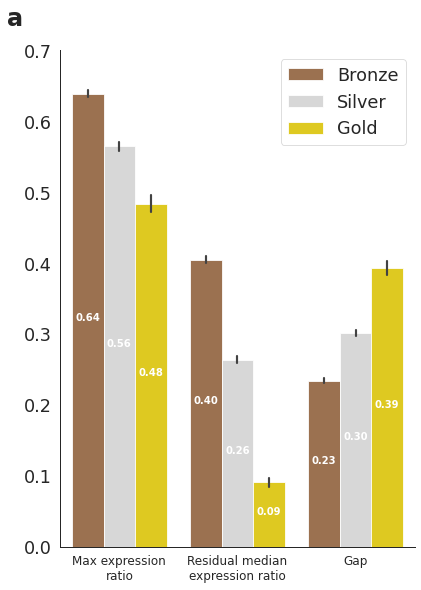

In [28]:
def show_values_on_bars(axs, i=0, fontsize=10, rotation=0, color='black', pad=10):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width()/2 
            _y = p.get_y() + (p.get_height()/2) + pad
            if i == 0:
                value = "{:,.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color=color, fontweight='semibold')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

cutoffs = [0.9, 0.95, 0.99]
l_df = list()
for j, c in enumerate(cutoffs):
    print(j, len(cutoffs), c)
    if j < (len(cutoffs) - 1):
        tmp = exotic_gap.loc[
            (exotic_gap["Max"] >= c) & (exotic_gap["Max"] < cutoffs[j + 1]),
            ["Max", "pext_max", "pext_median_except_max", "pext_shift"],
        ]
    else:
        tmp = exotic_gap.loc[exotic_gap["Max"] >= c, ["Max", "pext_max", "pext_median_except_max", "pext_shift"]]
    tmp["Threshold"] = c
    l_df.append(tmp)
tmp_df = pd.concat(l_df)
tmp_df = tmp_df.rename(
    {
        "pext_max": "Max expression\nratio",
        "pext_median_except_max": "Residual median\nexpression ratio",
        "pext_shift": "Gap",
    },
    axis=1,
)
tmp_df = tmp_df.melt(id_vars="Threshold", value_vars=["Max expression\nratio", "Residual median\nexpression ratio", "Gap"])
tmp_df

## BARPLOT PEXT SHIFT
# print(tmp_df.groupby(["Threshold", "variable"]).describe())

sns.set_style('white')
sns.set_context("paper", font_scale=2)
f, ax = plt.subplots(figsize=(6, 10))
v = sns.barplot(data=tmp_df, x="variable", y="value", hue="Threshold", ax=ax, palette=["#A77044", "#D7D7D7", "#FEE101"])
v.set_xticklabels(v.get_xticklabels(), rotation=45)
plt.xlabel("")
plt.ylabel("")
plt.ylim(0,0.7)
# ax.grid(True, axis="y")
f.tight_layout(rect=[0, 0.05, 1, 1])
v.set_xticklabels(v.get_xticklabels(), rotation=0, fontsize=12)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
legend = v.get_legend()
legend.set_title('')
show_values_on_bars(ax, i=2, rotation=0, color='white', pad=0)
ax.text(-0.15, 1.05, 'a', transform=ax.transAxes, size=24, weight='bold')

# f.savefig("data/paper/1_EXOTIC/barplot_test_pext_shift.png")
legend = v.get_legend()
legend.set_title('')
legend.texts[0].set_text("Bronze")
legend.texts[1].set_text("Silver")
legend.texts[2].set_text("Gold")

Rectangle(xy=(-0.4, 0), width=0.266667, height=43, angle=0)
Rectangle(xy=(0.6, 0), width=0.266667, height=23, angle=0)
Rectangle(xy=(1.6, 0), width=0.266667, height=139, angle=0)
Rectangle(xy=(2.6, 0), width=0.266667, height=152, angle=0)
Rectangle(xy=(3.6, 0), width=0.266667, height=31, angle=0)
Rectangle(xy=(4.6, 0), width=0.266667, height=428, angle=0)
Rectangle(xy=(5.6, 0), width=0.266667, height=354, angle=0)
Rectangle(xy=(6.6, 0), width=0.266667, height=258, angle=0)
Rectangle(xy=(7.6, 0), width=0.266667, height=172, angle=0)
Rectangle(xy=(8.6, 0), width=0.266667, height=50, angle=0)
Rectangle(xy=(9.6, 0), width=0.266667, height=581, angle=0)
Rectangle(xy=(10.6, 0), width=0.266667, height=271, angle=0)
Rectangle(xy=(11.6, 0), width=0.266667, height=44, angle=0)
Rectangle(xy=(12.6, 0), width=0.266667, height=456, angle=0)
Rectangle(xy=(13.6, 0), width=0.266667, height=117, angle=0)
Rectangle(xy=(14.6, 0), width=0.266667, height=34, angle=0)
Rectangle(xy=(15.6, 0), width=0.266667, 

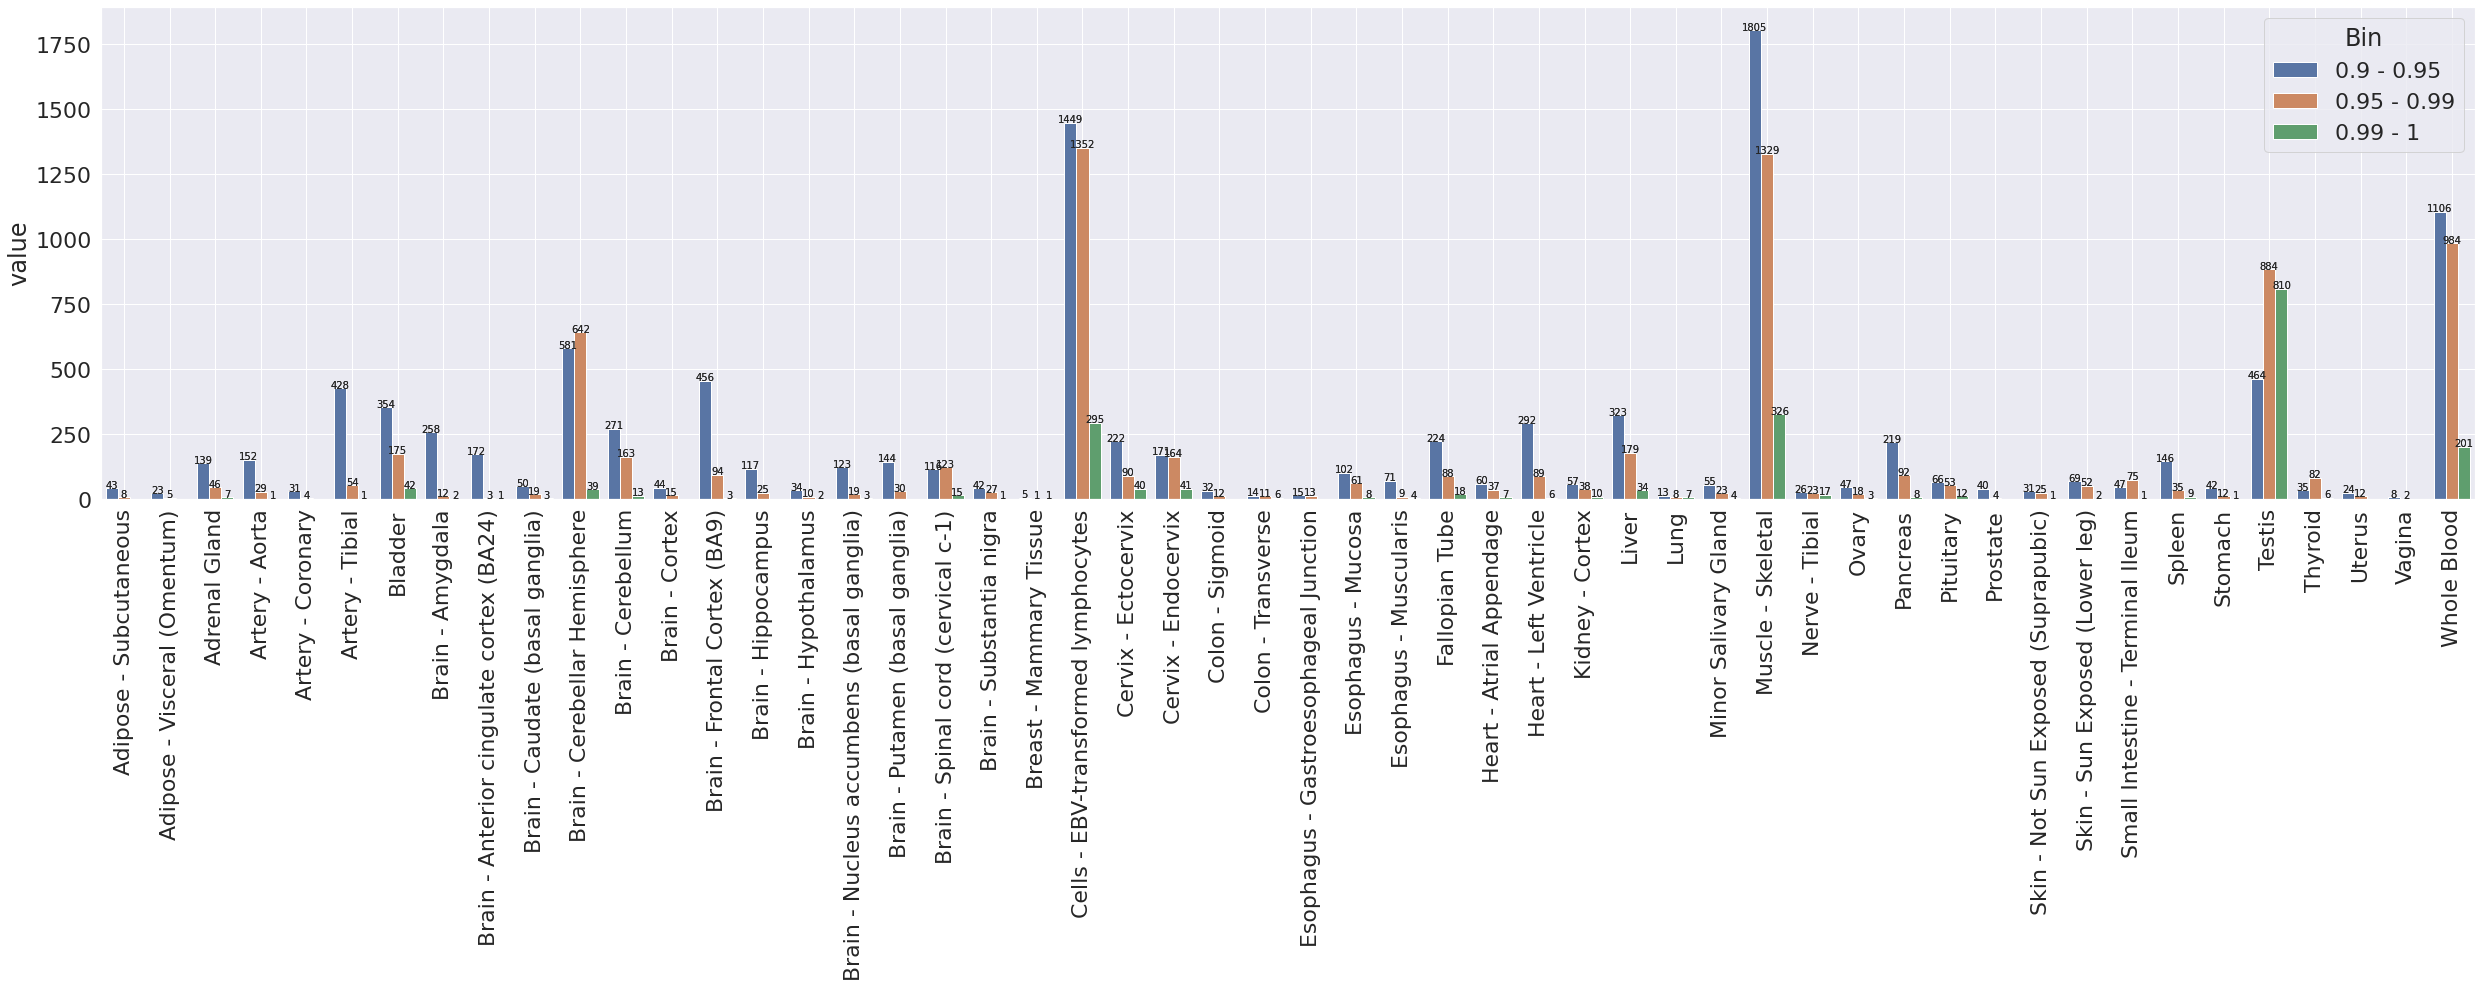

In [45]:

# BARPLOT TISSUES CUTOFFS

tmp_barplot_tissues = (
    exotic[["Max", "Tissues_Max", "pext_max", "Max_bins"]]
    .explode("Tissues_Max")
    .groupby(["Tissues_Max", "Max_bins"])
    .size()
    .reset_index()
)
tmp_barplot_tissues.columns = ["Tissue", "Bin", "value"]
tmp_barplot_tissues["Bin"] = tmp_barplot_tissues["Bin"].cat.remove_categories(["0 - 0.9"])

# print(tmp_barplot_tissues)

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(35, 15))
v = sns.barplot(data=tmp_barplot_tissues, x="Tissue", y="value", hue="Bin", ax=ax)
show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
f.tight_layout(rect=[0, 0.05, 1, 1])
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_bins_tissues_05_01.png")


(0.0, 10.0)

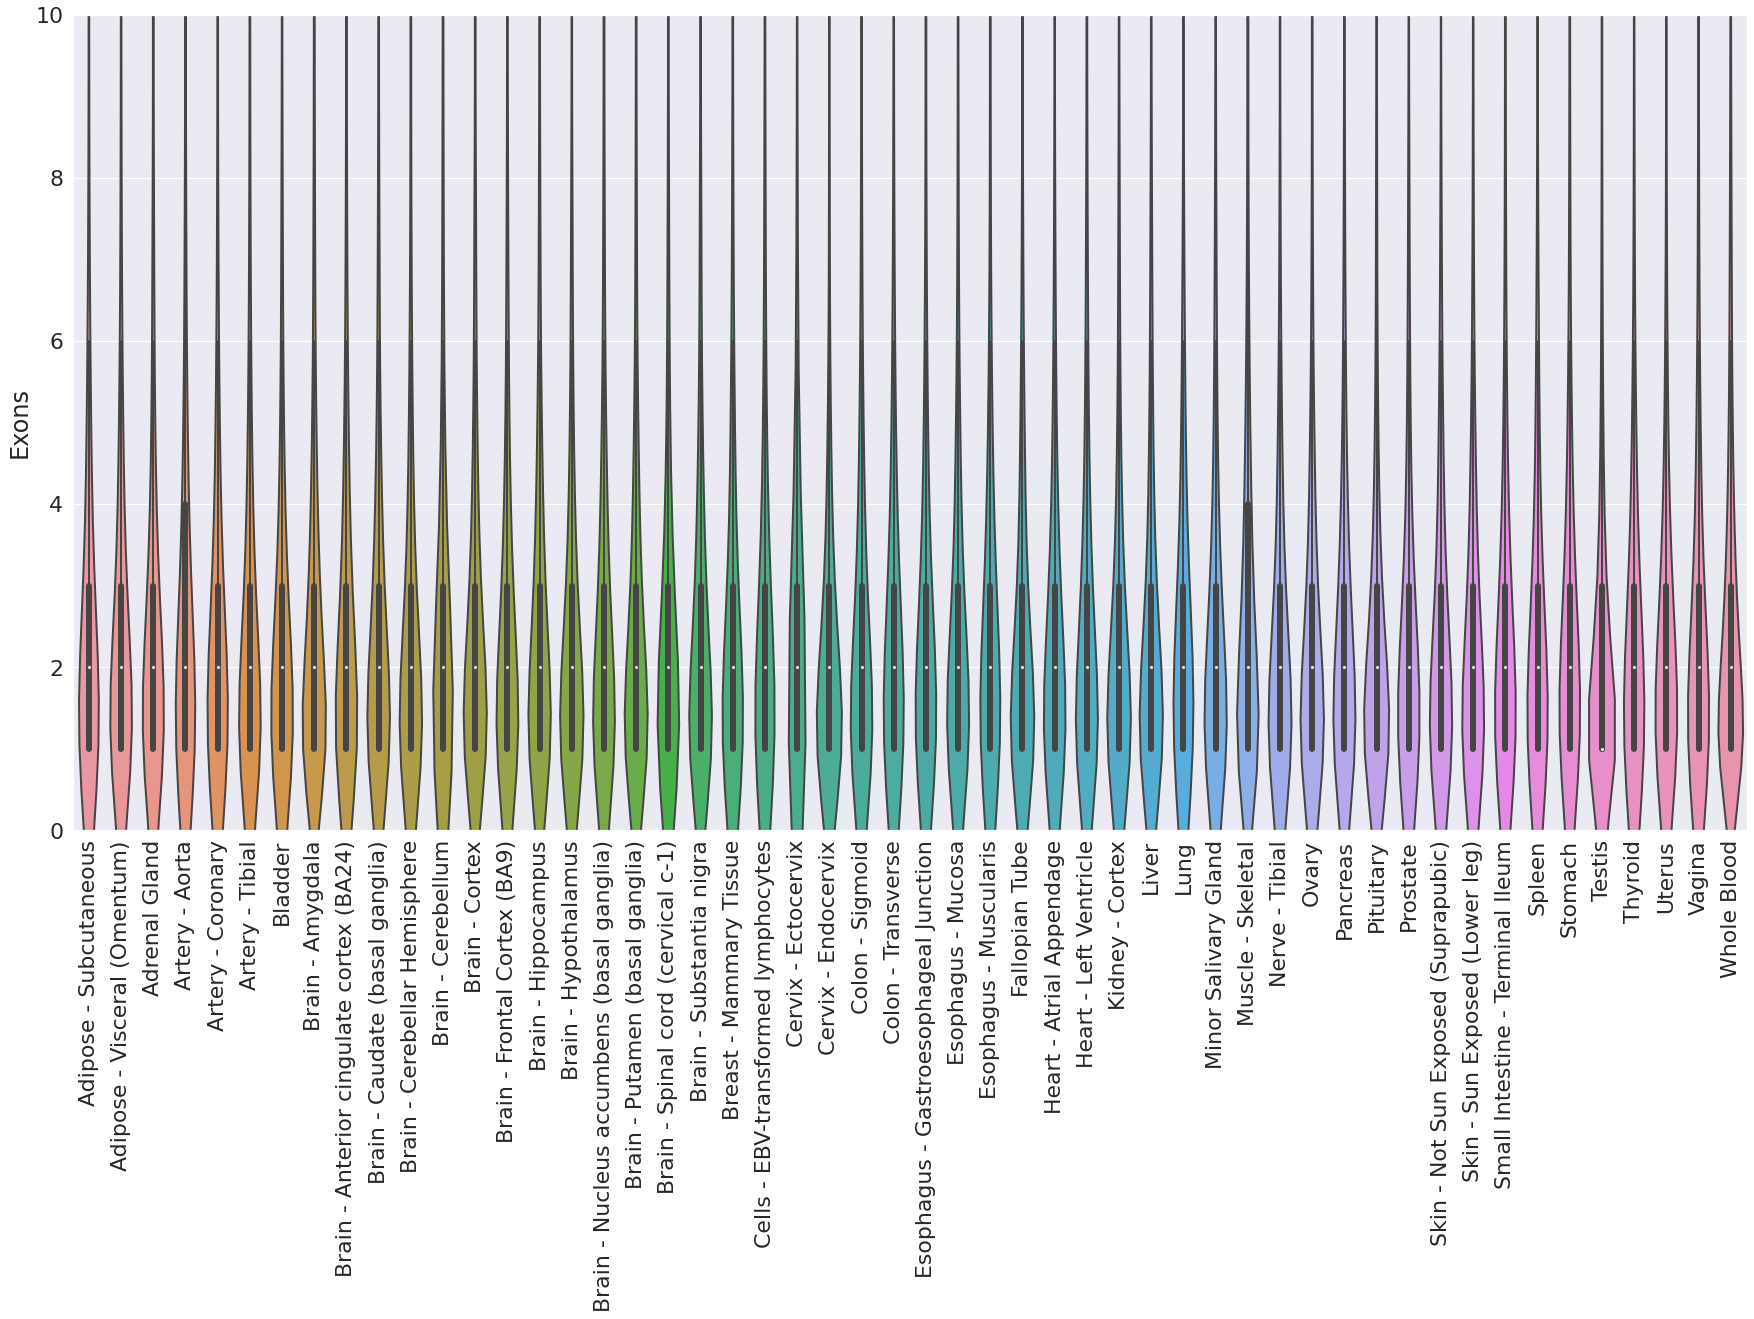

In [47]:


# BARPLOT TISSUES TOTAL

tmp_barplot_tissues = (
    exotic[["Tissues_Max", "symbol", "MAP"]].explode("Tissues_Max").groupby(["Tissues_Max", "symbol"]).nunique()
)
# tmp_barplot_tissues["Ratio"] = tmp_barplot_tissues["MAP"] / tmp_barplot_tissues["symbol"]
tmp_barplot_tissues.columns = ["Remove", "Genes", "Exons"]
tmp_barplot_tissues = tmp_barplot_tissues.drop(["Remove", "Genes"], axis=1).reset_index()

f, ax = plt.subplots(figsize=(30, 15))
v = sns.violinplot(data=tmp_barplot_tissues, x="Tissues_Max", y="Exons", linewidth=2)
show_values_on_bars(v, 2)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
ax.set_ylim(0, 10)


In [50]:
tmp_barplot_tissues

,Tissues_Max,symbol,Exons
0,Adipose - Subcutaneous,A2ML1,12
1,Adipose - Subcutaneous,ABI3BP,2
2,Adipose - Subcutaneous,ACBD5,1
3,Adipose - Subcutaneous,ACHE,1
4,Adipose - Subcutaneous,ACOXL,8
...,...,...,...
58826,Whole Blood,ZSCAN21,1
58827,Whole Blood,ZSCAN25,4
58828,Whole Blood,ZSCAN30,2
58829,Whole Blood,ZWILCH,5


In [ ]:


tmp_barplot_tissues = (
    tmp_barplot_tissues.reset_index().melt(id_vars="Tissues_Max", value_vars=["Genes", "Exons"])
)

mask = tmp_barplot_tissues.variable.isin(["Genes", "Exons"])
scale = float(tmp_barplot_tissues[~mask].value.mean() / tmp_barplot_tissues[mask].value.mean())
tmp_barplot_tissues.loc[mask, "value"] = tmp_barplot_tissues.loc[mask, "value"] * scale
# print(mask)

tmp_barplot_tissues.columns = ["Tissue", "value"]
tmp_barplot_tissues["Bin"] = tmp_barplot_tissues["Bin"].cat.remove_categories(["0 - 0.9"])

# print(tmp_barplot_tissues)

sns.set(font_scale=2)
f, ax1 = plt.subplots(figsize=(30, 15))
v = sns.barplot(data=tmp_barplot_tissues, x="Tissues_Max", y="value", hue="variable", ax=ax1)

# Create a second y-axis with the scaled ticks
# ax1.set_ylabel("X and Y")
# ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
# ax2.set_ylim(ax1.get_ylim())
# ax2.set_yticklabels(np.round(ax1.get_yticks() / scale, 1))
# ax2.set_ylabel("A and B")

show_values_on_bars(v, 0)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")

ax1.grid(True, axis="x")
f.tight_layout(rect=[0, 0.05, 1, 1])
# f.savefig("data/paper/1_EXOTIC/barplot_test_exotic_tissues.png")


In [ ]:
tmp_barplot = exotic.copy()
tmp_barplot["Min"] = tmp_barplot.apply(lambda r: min(r), axis=1)
tmp_barplot["Median"] = tmp_barplot.apply(lambda r: np.median(r), axis=1)
tmp_barplot["Mean"] = tmp_barplot.apply(lambda r: np.mean(r), axis=1)

plot_basic_stats_exotic = tmp_barplot[["Min", "Max", "Median", "Mean"]].melt(value_vars=["Min", "Max", "Median", "Mean"])

f, ax = plt.subplots(figsize=(10, 10))
v = sns.violinplot(data=plot_basic_stats_exotic, x="variable", y="value", ax=ax, linewidth=3)
# v.set_xticklabels(v.get_xticklabels(), rotation=90)
# plt.xlabel("")
ax.grid(True, axis="y")
# f.tight_layout(rect=[0, 0.05, 1, 1])
# f.savefig("data/paper/1_EXOTIC/violin_stats.png")

In [122]:
l = list()
l_pext_values = list()
values = [0.8, 0.9, 0.95, 0.99]
# values = [0.999]
for j, value in enumerate(values):
    if j < len(values) - 1:
        tmp_exotic = exotic.loc[(exotic["value"] >= value) & (exotic["value"] < values[j + 1])]
    else:
        tmp_exotic = exotic.loc[(exotic["value"] >= value)]
    tmp_pext = pext.loc[tmp_exotic.index]

    # print(tmp_pext.parallel_apply(apply_pext_comparison, axis=1))
    tmp_pext["hue"] = value
    # print(tmp_pext)
    # exit

    # tmp_pext_pivot = pd.pivot(tmp_pext, index="MAP", columns="variable", values="value")
    # tmp_pext_others = intermediate_file.loc[intermediate_file["MAP"].isin(list(tmp_pext.MAP.unique()))]
    # print(tmp_pext_pivot)
    # print(tmp_pext_others)
    # exit()
    # low = tmp_pext.loc[tmp_pext["value"] < 0.1]
    # for i, row in low.iterrows():
    # print(row)
    # print(pext.loc[pext["symbol"] == row["symbol"]].pivot(index="MAP", columns="variable", values="value"))
    # print(pext.loc[pext["symbol"].isin(low.symbol.unique().tolist())])
    # exit()
    # print(tmp_exotic)
    # print(tmp_pext)
    l_pext_values.append(tmp_pext)
    tmp_exotic = tmp_exotic.groupby("variable").size()
    l.append(tmp_exotic)
plot_exotic = pd.concat(l, axis=1).reset_index()
plot_exotic.columns = ["Tissue"] + values
plot_exotic = plot_exotic.melt(id_vars="Tissue", value_vars=values)
# plot_exotic = plot_exotic.loc[~plot_exotic["Tissue"].isin(["Min", "Max", "Median", "Mean"])]
plot_exotic_pext = pd.concat(l_pext_values, axis=0)

KeyError: 'value'

In [127]:
exotic.columns

Index(['Adipose - Subcutaneous_exotic', 'Adipose - Visceral (Omentum)_exotic',
       'Adrenal Gland_exotic', 'Artery - Aorta_exotic',
       'Artery - Coronary_exotic', 'Artery - Tibial_exotic', 'Bladder_exotic',
       'Brain - Amygdala_exotic',
       'Brain - Anterior cingulate cortex (BA24)_exotic',
       'Brain - Caudate (basal ganglia)_exotic',
       'Brain - Cerebellar Hemisphere_exotic', 'Brain - Cerebellum_exotic',
       'Brain - Cortex_exotic', 'Brain - Frontal Cortex (BA9)_exotic',
       'Brain - Hippocampus_exotic', 'Brain - Hypothalamus_exotic',
       'Brain - Nucleus accumbens (basal ganglia)_exotic',
       'Brain - Putamen (basal ganglia)_exotic',
       'Brain - Spinal cord (cervical c-1)_exotic',
       'Brain - Substantia nigra_exotic', 'Breast - Mammary Tissue_exotic',
       'Cells - EBV-transformed lymphocytes_exotic',
       'Cervix - Ectocervix_exotic', 'Cervix - Endocervix_exotic',
       'Colon - Sigmoid_exotic', 'Colon - Transverse_exotic',
       'Esop

In [126]:


# exit()
# # exotic["MAP"] = intermediate_file["MAP"]

# # Binning EXOTIC
# # bins = [0, 0.5, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1]
# bins = [0, 0.9, 0.95, 0.99, 1]
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
# exotic["Max_bins"] = pd.cut(exotic["Max"], bins=bins, labels=labels_ratio, include_lowest=True)

exotic = exotic.melt(id_vars=["MAP"], value_vars=exotic.columns[:-1])
exotic["variable"] = exotic["variable"].str.replace("_exotic", "")
pext = pext.melt(id_vars=["MAP", "symbol"], value_vars=pext.columns[:-2])
pext["variable"] = pext["variable"].str.replace("_pextvalue", "")

def apply_pext_comparison(r):
    median_pext_value_other_tissues = float(
        (
            intermediate_file.loc[intermediate_file["MAP"] == r["MAP"]]
            .filter(regex="pext")
            .T.dropna()
            .drop(r["variable"] + "_pextvalue")
            .median()
        )
    )
    fold = float(r["value"] / median_pext_value_other_tissues)
    r["median_others"] = median_pext_value_other_tissues
    r["fold"] = fold
    return r

l = list()
l_pext_values = list()
values = [0.8, 0.9, 0.95, 0.99]
# values = [0.999]
for j, value in enumerate(values):
    if j < len(values) - 1:
        tmp_exotic = exotic.loc[(exotic["value"] >= value) & (exotic["value"] < values[j + 1])]
    else:
        tmp_exotic = exotic.loc[(exotic["value"] >= value)]
    tmp_pext = pext.loc[tmp_exotic.index]

    # print(tmp_pext.parallel_apply(apply_pext_comparison, axis=1))
    tmp_pext["hue"] = value
    # print(tmp_pext)
    # exit

    # tmp_pext_pivot = pd.pivot(tmp_pext, index="MAP", columns="variable", values="value")
    # tmp_pext_others = intermediate_file.loc[intermediate_file["MAP"].isin(list(tmp_pext.MAP.unique()))]
    # print(tmp_pext_pivot)
    # print(tmp_pext_others)
    # exit()
    # low = tmp_pext.loc[tmp_pext["value"] < 0.1]
    # for i, row in low.iterrows():
    # print(row)
    # print(pext.loc[pext["symbol"] == row["symbol"]].pivot(index="MAP", columns="variable", values="value"))
    # print(pext.loc[pext["symbol"].isin(low.symbol.unique().tolist())])
    # exit()
    # print(tmp_exotic)
    # print(tmp_pext)
    l_pext_values.append(tmp_pext)
    tmp_exotic = tmp_exotic.groupby("variable").size()
    l.append(tmp_exotic)
plot_exotic = pd.concat(l, axis=1).reset_index()
plot_exotic.columns = ["Tissue"] + values
plot_exotic = plot_exotic.melt(id_vars="Tissue", value_vars=values)
# plot_exotic = plot_exotic.loc[~plot_exotic["Tissue"].isin(["Min", "Max", "Median", "Mean"])]
plot_exotic_pext = pd.concat(l_pext_values, axis=0)



Exception: Data must be 1-dimensional

In [ ]:
plt.style.use("ggplot")

sns.set(font_scale=2)

f, ax = plt.subplots(figsize=(35, 15))
v = sns.barplot(data=plot_exotic, x="variable", y="value", ax=ax)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
f.tight_layout(rect=[0, 0.05, 1, 1])
f.savefig("data/paper/1_EXOTIC/barplot_test.png")

sns.set(font_scale=1)

f, ax = plt.subplots(figsize=(45, 15))
v = sns.boxplot(data=plot_exotic_pext, x="hue", y="value", ax=ax)
v.set_xticklabels(v.get_xticklabels(), rotation=90)
plt.xlabel("")
ax.grid(True, axis="x")
# f.tight_layout(rect=[0, 0.05, 1, 1])
f.savefig("data/paper/1_EXOTIC/violin_pext.png")
